In [14]:
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV,LassoCV
from sklearn.model_selection import train_test_split,GridSearchCV,KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score,mean_squared_error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [15]:
diabetes=load_diabetes(return_X_y=True)
X=diabetes[0]
y=diabetes[1]

In [16]:
len(X),len(y)

(442, 442)

In [17]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train

array([[ 0.07076875,  0.05068012,  0.01211685, ...,  0.03430886,
         0.02736405, -0.0010777 ],
       [-0.00914709,  0.05068012, -0.01806189, ...,  0.07120998,
         0.00027248,  0.01963284],
       [ 0.00538306, -0.04464164,  0.04984027, ..., -0.00259226,
         0.01703607, -0.01350402],
       ...,
       [ 0.03081083, -0.04464164, -0.02021751, ..., -0.03949338,
        -0.01090325, -0.0010777 ],
       [-0.01277963, -0.04464164, -0.02345095, ..., -0.00259226,
        -0.03845972, -0.03835666],
       [-0.09269548, -0.04464164,  0.02828403, ..., -0.03949338,
        -0.00514219, -0.0010777 ]])

In [18]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [19]:
def prediction_model(model):
    cv=KFold()
    model=model(cv=cv)
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    print(f"The r2 score for the {model} is {r2_score(y_test,y_pred)}")
    plt.scatter(y_test,y_pred,c='g')
    plt.plot(y_test,y_test)
    

The r2 score for the RidgeCV(cv=KFold(n_splits=5, random_state=None, shuffle=False)) is 0.4572109567780849


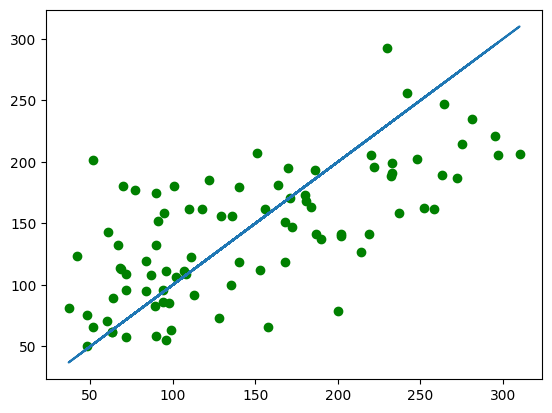

In [20]:
prediction_model(RidgeCV)

The r2 score for the LassoCV(cv=KFold(n_splits=5, random_state=None, shuffle=False)) is 0.4714218340088624


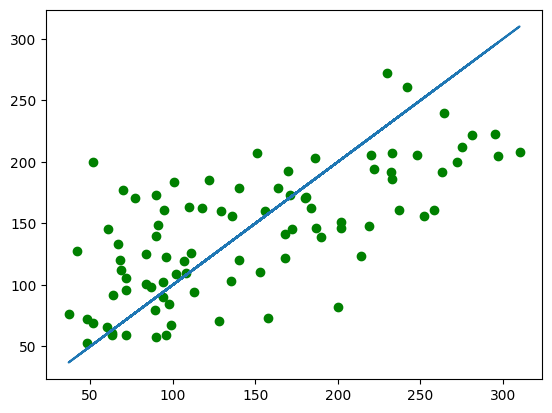

In [21]:
prediction_model(LassoCV)

### So from using linear models like ridgecv and lasso cv accuracy is not that high ,means linear model may not work 